In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
%matplotlib inline 

In [2]:
STATS_CSV = "Seasons_Stats.csv"
PLAYER_DATA_CSV = "player_data.csv"
#Read data
stats = pd.read_csv(STATS_CSV)
#Only keep players that have played many minutes, are in the 5 major positions
pos = ['C', 'PF', 'PG', 'SG', 'SF']
stats = stats[stats['MP'] >= 1750]
stats = stats[stats['Pos'].isin(pos)]
#Only keep useful columns
stats = stats[['Pos', 'Age', 'TS%', '3PAr', 'TRB%', 'AST%', 'STL%', 'BLK%', 'USG%', 'FG%', '3P%', '2P%', 'FT%']]
#Drop rows with missing data
stats = stats.dropna(0)

In [3]:
#Get and normalize the features
X = stats.drop(['Pos'], axis=1)
feature_labels = X.columns
X = X.to_numpy()
#normalize(X, copy=False)
X_scaled = StandardScaler().fit(X).transform(X)

#Get and normalize the target
y = stats['Pos']
for i in range(5):
    y = y.replace(to_replace=pos[i], value=i)
y = y.to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.33, random_state=21)

# Neural Network with Sigmoid Activation Function

In [4]:
alphas = [100, 10, 1, 0.1, 0.01, 0.001, 0.0001, 0.00001, 0]

sigmoid_ts_accs = []
sigmoid_tr_accs = []

def run_nn_sigmoid(X_tr, y_tr, X_ts, y_ts):

    for a in alphas:
        nn_log = MLPClassifier(hidden_layer_sizes=(50), activation="logistic", alpha=a, max_iter=10000, random_state=21)
        nn_log.fit(X_tr, y_tr)
        
        tr_pred = nn_log.predict(X_tr)
        print("Alpha=", a, ", Train Accuracy=", accuracy_score(y_tr,tr_pred))
        print(classification_report(y_tr,tr_pred,labels=[0,1,2,3,4],target_names=pos))
        sigmoid_tr_accs.append(accuracy_score(y_tr,tr_pred))
        
        ts_pred = nn_log.predict(X_ts)
        print("Alpha=", a, ", Test Accuracy=", accuracy_score(y_ts,ts_pred))
        print(classification_report(y_ts,ts_pred,labels=[0,1,2,3,4],target_names=pos))
        sigmoid_ts_accs.append(accuracy_score(y_ts,ts_pred))
        print("========================================================")

In [5]:
sigmoid_ts_accs = []
sigmoid_tr_accs = []
run_nn_sigmoid(X_train, y_train, X_test, y_test)

Alpha= 100 , Train Accuracy= 0.21685689201053557


C:\Users\Rihui\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Rihui\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           C       0.00      0.00      0.00       492
          PF       0.00      0.00      0.00       673
          PG       0.22      1.00      0.36       741
          SG       0.00      0.00      0.00       749
          SF       0.00      0.00      0.00       762

    accuracy                           0.22      3417
   macro avg       0.04      0.20      0.07      3417
weighted avg       0.05      0.22      0.08      3417

Alpha= 100 , Test Accuracy= 0.2167458432304038
              precision    recall  f1-score   support

           C       0.00      0.00      0.00       230
          PF       0.00      0.00      0.00       337
          PG       0.22      1.00      0.36       365
          SG       0.00      0.00      0.00       384
          SF       0.00      0.00      0.00       368

    accuracy                           0.22      1684
   macro avg       0.04      0.20      0.07      1684
weighted avg       0.05      0

Alpha= 0 , Train Accuracy= 0.7190517998244074
              precision    recall  f1-score   support

           C       0.70      0.70      0.70       492
          PF       0.63      0.65      0.64       673
          PG       0.89      0.90      0.89       741
          SG       0.71      0.71      0.71       749
          SF       0.66      0.63      0.64       762

    accuracy                           0.72      3417
   macro avg       0.72      0.72      0.72      3417
weighted avg       0.72      0.72      0.72      3417

Alpha= 0 , Test Accuracy= 0.7191211401425178
              precision    recall  f1-score   support

           C       0.71      0.63      0.67       230
          PF       0.63      0.68      0.65       337
          PG       0.89      0.91      0.90       365
          SG       0.71      0.70      0.71       384
          SF       0.65      0.65      0.65       368

    accuracy                           0.72      1684
   macro avg       0.72      0.71      0

# relu Activation Function

In [6]:
alphas = [100, 10, 1, 0.1, 0.01, 0.001, 0.0001, 0.00001, 0]
relu_ts_accs = []
relu_tr_accs = []

def run_nn_relu(X_tr, y_tr, X_ts, y_ts):
    for a in alphas:
        nn_relu = MLPClassifier(hidden_layer_sizes=(50),activation="relu", alpha=a, max_iter=10000, random_state=21)
        nn_relu.fit(X_tr, y_tr)
        
        tr_pred = nn_relu.predict(X_tr)
        print("Alpha=", a, ", Train Accuracy=", accuracy_score(y_tr,tr_pred))
        print(classification_report(y_tr,tr_pred,labels=[0,1,2,3,4],target_names=pos))
        relu_tr_accs.append(accuracy_score(y_tr,tr_pred))
        
        ts_pred = nn_relu.predict(X_ts)
        print("Alpha=", a, ", Test Accuracy=", accuracy_score(y_ts,ts_pred))
        print(classification_report(y_ts,ts_pred,labels=[0,1,2,3,4],target_names=pos))
        relu_ts_accs.append(accuracy_score(y_ts,ts_pred))
        print("========================================================")

In [7]:
relu_ts_accs = []
relu_tr_accs = []
run_nn_relu(X_train, y_train, X_test, y_test)

Alpha= 100 , Train Accuracy= 0.43576236464735146
              precision    recall  f1-score   support

           C       0.00      0.00      0.00       492
          PF       0.00      0.00      0.00       673
          PG       0.70      0.79      0.74       741
          SG       0.55      0.42      0.48       749
          SF       0.29      0.77      0.42       762

    accuracy                           0.44      3417
   macro avg       0.31      0.40      0.33      3417
weighted avg       0.34      0.44      0.36      3417

Alpha= 100 , Test Accuracy= 0.418646080760095
              precision    recall  f1-score   support

           C       0.00      0.00      0.00       230
          PF       0.00      0.00      0.00       337
          PG       0.69      0.77      0.73       365
          SG       0.52      0.38      0.44       384
          SF       0.28      0.76      0.41       368

    accuracy                           0.42      1684
   macro avg       0.30      0.38   

C:\Users\Rihui\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Rihui\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Alpha= 10 , Train Accuracy= 0.6698858647936786
              precision    recall  f1-score   support

           C       0.72      0.52      0.61       492
          PF       0.55      0.67      0.61       673
          PG       0.84      0.90      0.87       741
          SG       0.63      0.72      0.67       749
          SF       0.63      0.48      0.55       762

    accuracy                           0.67      3417
   macro avg       0.67      0.66      0.66      3417
weighted avg       0.67      0.67      0.67      3417

Alpha= 10 , Test Accuracy= 0.6882422802850356
              precision    recall  f1-score   support

           C       0.73      0.50      0.59       230
          PF       0.58      0.69      0.63       337
          PG       0.83      0.93      0.88       365
          SG       0.67      0.71      0.69       384
          SF       0.65      0.55      0.59       368

    accuracy                           0.69      1684
   macro avg       0.69      0.67     

# tanh Activation Function

In [8]:
alphas = [100, 10, 1, 0.1, 0.01, 0.001, 0.0001, 0.00001, 0]
tanh_ts_accs = []
tanh_tr_accs = []

def run_nn_tanh(X_tr, y_tr, X_ts, y_ts):
    for a in alphas:
        nn_tanh = MLPClassifier(hidden_layer_sizes=(50),activation="tanh", alpha=a, max_iter=10000, random_state=21)
        nn_tanh.fit(X_tr, y_tr)
        
        tr_pred = nn_tanh.predict(X_tr)
        print("Alpha=", a, ", Train Accuracy=", accuracy_score(y_tr,tr_pred))
        print(classification_report(y_tr,tr_pred,labels=[0,1,2,3,4],target_names=pos))
        tanh_tr_accs.append(accuracy_score(y_tr,tr_pred))
        
        ts_pred = nn_tanh.predict(X_ts)
        print("Alpha=", a, ", Test Accuracy=", accuracy_score(y_ts,ts_pred))
        print(classification_report(y_ts,ts_pred,labels=[0,1,2,3,4],target_names=pos))
        tanh_ts_accs.append(accuracy_score(y_ts,ts_pred))
        print("========================================================")

In [9]:
tanh_ts_accs = []
tanh_tr_accs = []
run_nn_tanh(X_train, y_train, X_test, y_test)

Alpha= 100 , Train Accuracy= 0.2870939420544337
              precision    recall  f1-score   support

           C       0.00      0.00      0.00       492
          PF       0.00      0.00      0.00       673
          PG       0.36      1.00      0.52       741
          SG       0.00      0.00      0.00       749
          SF       0.18      0.32      0.23       762

    accuracy                           0.29      3417
   macro avg       0.11      0.26      0.15      3417
weighted avg       0.12      0.29      0.17      3417

Alpha= 100 , Test Accuracy= 0.28978622327790976
              precision    recall  f1-score   support

           C       0.00      0.00      0.00       230
          PF       0.00      0.00      0.00       337
          PG       0.35      1.00      0.52       365
          SG       0.00      0.00      0.00       384
          SF       0.19      0.33      0.24       368

    accuracy                           0.29      1684
   macro avg       0.11      0.27  

C:\Users\Rihui\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Rihui\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Alpha= 10 , Train Accuracy= 0.6695932104184957
              precision    recall  f1-score   support

           C       0.65      0.59      0.62       492
          PF       0.56      0.55      0.56       673
          PG       0.82      0.92      0.87       741
          SG       0.66      0.67      0.67       749
          SF       0.61      0.58      0.59       762

    accuracy                           0.67      3417
   macro avg       0.66      0.66      0.66      3417
weighted avg       0.66      0.67      0.67      3417

Alpha= 10 , Test Accuracy= 0.6787410926365796
              precision    recall  f1-score   support

           C       0.67      0.60      0.63       230
          PF       0.59      0.54      0.56       337
          PG       0.82      0.94      0.88       365
          SG       0.68      0.66      0.67       384
          SF       0.60      0.60      0.60       368

    accuracy                           0.68      1684
   macro avg       0.67      0.67     

# Identity Function as Activation Function

In [10]:
alphas = [100, 10, 1, 0.1, 0.01, 0.001, 0.0001, 0.00001, 0]
id_ts_accs = []
id_tr_accs = []

def run_nn_id(X_tr, y_tr, X_ts, y_ts):
    for a in alphas:
        nn_id = MLPClassifier(hidden_layer_sizes=(50), activation="identity", alpha=a, max_iter=10000, random_state=21)
        nn_id.fit(X_tr, y_tr)
        
        tr_pred = nn_id.predict(X_tr)
        print("Alpha=", a, ", Train Accuracy=", accuracy_score(y_tr,tr_pred))
        print(classification_report(y_tr,tr_pred,labels=[0,1,2,3,4],target_names=pos))
        id_tr_accs.append(accuracy_score(y_tr,tr_pred))
        
        ts_pred = nn_id.predict(X_ts)
        print("Alpha=", a, ", Test Accuracy=", accuracy_score(y_ts,ts_pred))
        print(classification_report(y_ts,ts_pred,labels=[0,1,2,3,4],target_names=pos))
        id_ts_accs.append(accuracy_score(y_ts,ts_pred))
        print("========================================================")

In [11]:
id_ts_accs = []
id_tr_accs = []
run_nn_id(X_train, y_train, X_test, y_test)

Alpha= 100 , Train Accuracy= 0.3386011120866257
              precision    recall  f1-score   support

           C       0.00      0.00      0.00       492
          PF       0.04      0.00      0.00       673
          PG       0.49      0.95      0.65       741
          SG       0.30      0.22      0.25       749
          SF       0.20      0.37      0.26       762

    accuracy                           0.34      3417
   macro avg       0.21      0.31      0.23      3417
weighted avg       0.22      0.34      0.26      3417

Alpha= 100 , Test Accuracy= 0.35332541567695963
              precision    recall  f1-score   support

           C       0.00      0.00      0.00       230
          PF       0.00      0.00      0.00       337
          PG       0.49      0.95      0.65       365
          SG       0.35      0.26      0.30       384
          SF       0.22      0.40      0.28       368

    accuracy                           0.35      1684
   macro avg       0.21      0.32  

C:\Users\Rihui\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Rihui\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Alpha= 10 , Train Accuracy= 0.6736903716710565
              precision    recall  f1-score   support

           C       0.68      0.56      0.62       492
          PF       0.56      0.60      0.58       673
          PG       0.84      0.91      0.87       741
          SG       0.65      0.70      0.68       749
          SF       0.62      0.55      0.59       762

    accuracy                           0.67      3417
   macro avg       0.67      0.67      0.67      3417
weighted avg       0.67      0.67      0.67      3417

Alpha= 10 , Test Accuracy= 0.6882422802850356
              precision    recall  f1-score   support

           C       0.70      0.57      0.63       230
          PF       0.59      0.62      0.61       337
          PG       0.83      0.93      0.88       365
          SG       0.67      0.68      0.68       384
          SF       0.62      0.59      0.60       368

    accuracy                           0.69      1684
   macro avg       0.68      0.68     

In [12]:
def plot_accs(alphas, train_accs, test_accs, title):
    plt.plot(alphas,train_accs,'.-')
    plt.plot(alphas,test_accs,'.-')
    plt.xlabel('alpha')
    plt.ylabel('accuracy')
    plt.xscale('log')
#     plt.ylim((0.2, 1))
    plt.title(title)
    plt.grid()
    plt.legend(['Training Accuracy', 'Test Accuracy'])
    plt.show(block=False)

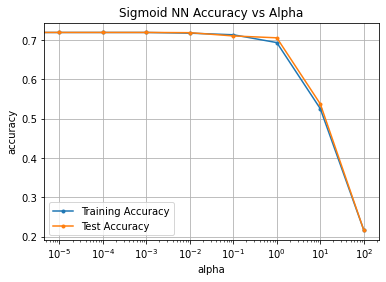

Max test accuracy: 0.7191211401425178 with alpha = 0.001
Max train accuracy: 0.7190517998244074 with alpha = 0.001


In [13]:
plot_accs(alphas, sigmoid_tr_accs, sigmoid_ts_accs, "Sigmoid NN Accuracy vs Alpha")
print("Max test accuracy:", max(sigmoid_ts_accs), "with alpha =", alphas[sigmoid_ts_accs.index(max(sigmoid_ts_accs))])
print("Max train accuracy:", max(sigmoid_tr_accs),"with alpha =", alphas[sigmoid_tr_accs.index(max(sigmoid_tr_accs))])

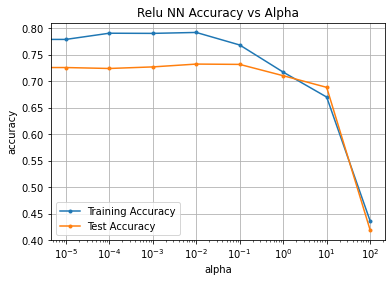

Max test accuracy: 0.732185273159145 with alpha = 0.01
Max train accuracy: 0.7919227392449517 with alpha = 0.01


In [14]:
plot_accs(alphas, relu_tr_accs, relu_ts_accs, "Relu NN Accuracy vs Alpha")
print("Max test accuracy:", max(relu_ts_accs), "with alpha =", alphas[relu_ts_accs.index(max(relu_ts_accs))])
print("Max train accuracy:", max(relu_tr_accs), "with alpha =", alphas[relu_tr_accs.index(max(relu_tr_accs))])

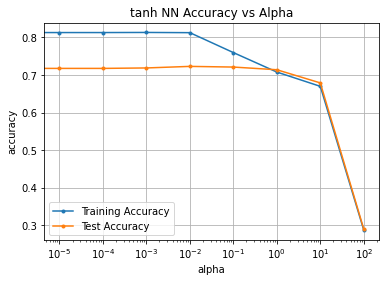

Max test accuracy: 0.7226840855106889 with alpha = 0.01
Max train accuracy: 0.8129938542581212 with alpha = 0.001


In [15]:
plot_accs(alphas, tanh_tr_accs, tanh_ts_accs, "tanh NN Accuracy vs Alpha")
print("Max test accuracy:", max(tanh_ts_accs), "with alpha =", alphas[tanh_ts_accs.index(max(tanh_ts_accs))])
print("Max train accuracy:", max(tanh_tr_accs), "with alpha =", alphas[tanh_tr_accs.index(max(tanh_tr_accs))])

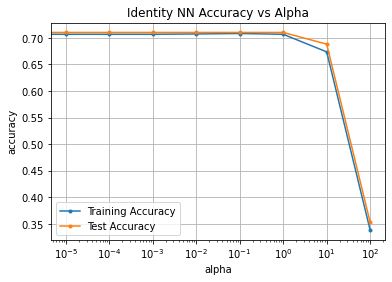

Max test accuracy: 0.7102137767220903 with alpha = 1
Max train accuracy: 0.7082235879426397 with alpha = 0.1


In [16]:
plot_accs(alphas, id_tr_accs, id_ts_accs, "Identity NN Accuracy vs Alpha")
print("Max test accuracy:", max(id_ts_accs), "with alpha =", alphas[id_ts_accs.index(max(id_ts_accs))])
print("Max train accuracy:", max(id_tr_accs), "with alpha =", alphas[id_tr_accs.index(max(id_tr_accs))])

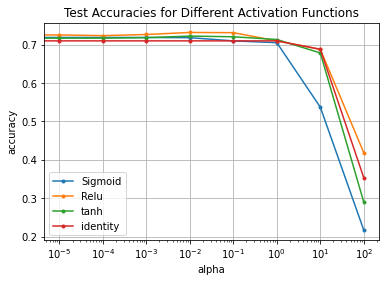

In [17]:
plt.plot(alphas,sigmoid_ts_accs,'.-')
plt.plot(alphas,relu_ts_accs,'.-')
plt.plot(alphas,tanh_ts_accs,'.-')
plt.plot(alphas,id_ts_accs,'.-')
plt.xlabel('alpha')
plt.ylabel('accuracy')
plt.xscale('log')
plt.title("Test Accuracies for Different Activation Functions")
plt.grid()
plt.legend(['Sigmoid', 'Relu', 'tanh', 'identity'])
plt.show(block=False)

# Testing different hidden layers with different alphas

In [5]:
alphas = [100, 10, 1, 0.1, 0.01, 0.001, 0.0001, 0.00001, 0]
hl_sizes = [(70), (70,70), (50), (50,50), (30), (30,30)]
tot_sig_acc_tr = []
tot_sig_acc_ts = []

def nn_sigmoid(X_tr, y_tr, X_ts, y_ts):
    accs=[]
    for size in hl_sizes:
        sig_acc_tr = []
        sig_acc_ts = []
        for a in alphas:

            nn_log = MLPClassifier(hidden_layer_sizes=size, activation="logistic", alpha=a, max_iter=10000, random_state=21)
            nn_log.fit(X_tr, y_tr)
            
            tr_pred = nn_log.predict(X_tr)
            acc=accuracy_score(y_tr,tr_pred)
            sig_acc_tr.append(acc)
            
            ts_pred = nn_log.predict(X_ts)
            acc=accuracy_score(y_ts,ts_pred)
            sig_acc_ts.append(acc)
            accs.append((acc, size, a))
        tot_sig_acc_tr.append(sig_acc_tr)
        tot_sig_acc_ts.append(sig_acc_ts)
            
    max_acc=(0,0,0)
    for acc in accs:
        if acc[0] > max_acc[0]:
            max_acc=acc
            
    print("The best accuracy is", max_acc[0], "with hidden layer sizes", max_acc[1], "and alpha value", max_acc[2])
    nn_log = MLPClassifier(activation="logistic", hidden_layer_sizes=max_acc[1], alpha=max_acc[2], max_iter=10000, random_state=21)
    nn_log.fit(X_tr, y_tr)

    tr_pred = nn_log.predict(X_tr)
    print("Alpha=", max_acc[2], ", Train Accuracy=", accuracy_score(y_tr,tr_pred))
    print(classification_report(y_tr,tr_pred,labels=[0,1,2,3,4],target_names=pos))


    ts_pred = nn_log.predict(X_ts)
    print("Alpha=", max_acc[2], ", Test Accuracy=", accuracy_score(y_ts,ts_pred))
    print(classification_report(y_ts,ts_pred,labels=[0,1,2,3,4],target_names=pos))

In [6]:
tot_sig_acc_tr = []
tot_sig_acc_ts = []
nn_sigmoid(X_train, y_train, X_test, y_test)

The best accuracy is 0.7256532066508313 with hidden layer sizes (30, 30) and alpha value 0.0001
Alpha= 0.0001 , Train Accuracy= 0.7415861867134914
              precision    recall  f1-score   support

           C       0.74      0.72      0.73       492
          PF       0.66      0.67      0.67       673
          PG       0.90      0.90      0.90       741
          SG       0.72      0.73      0.73       749
          SF       0.68      0.67      0.67       762

    accuracy                           0.74      3417
   macro avg       0.74      0.74      0.74      3417
weighted avg       0.74      0.74      0.74      3417

Alpha= 0.0001 , Test Accuracy= 0.7256532066508313
              precision    recall  f1-score   support

           C       0.74      0.65      0.69       230
          PF       0.65      0.69      0.67       337
          PG       0.90      0.90      0.90       365
          SG       0.72      0.70      0.71       384
          SF       0.63      0.67      0.65

In [7]:
tot_relu_acc_tr = []
tot_relu_acc_ts = []

def nn_relu(X_tr, y_tr, X_ts, y_ts):
    accs=[]
    for size in hl_sizes:
        relu_acc_tr = []
        relu_acc_ts = []
        for a in alphas:

            nn_relu = MLPClassifier(hidden_layer_sizes=size, activation="relu", alpha=a, max_iter=10000, random_state=21)
            nn_relu.fit(X_tr, y_tr)
            
            tr_pred = nn_relu.predict(X_tr)
            acc=accuracy_score(y_tr,tr_pred)
            relu_acc_tr.append(acc)
            
            ts_pred = nn_relu.predict(X_ts)
            acc=accuracy_score(y_ts,ts_pred)
            relu_acc_ts.append(acc)
            accs.append((acc, size, a))
        tot_relu_acc_tr.append(relu_acc_tr)
        tot_relu_acc_ts.append(relu_acc_ts)
            
    max_acc=(0,0,0)
    for acc in accs:
        if acc[0] > max_acc[0]:
            max_acc=acc
            
    print("The best accuracy is", max_acc[0], "with hidden layer sizes", max_acc[1], "and alpha value", max_acc[2])
    nn_relu = MLPClassifier(activation="relu", hidden_layer_sizes=max_acc[1], alpha=max_acc[2], max_iter=10000, random_state=21)
    nn_relu.fit(X_tr, y_tr)

    tr_pred = nn_relu.predict(X_tr)
    print("Alpha=", max_acc[2], ", Train Accuracy=", accuracy_score(y_tr,tr_pred))
    print(classification_report(y_tr,tr_pred,labels=[0,1,2,3,4],target_names=pos))


    ts_pred = nn_relu.predict(X_ts)
    print("Alpha=", max_acc[2], ", Test Accuracy=", accuracy_score(y_ts,ts_pred))
    print(classification_report(y_ts,ts_pred,labels=[0,1,2,3,4],target_names=pos))

In [10]:
tot_relu_acc_tr = []
tot_relu_acc_ts = []
nn_relu(X_train, y_train, X_test, y_test)

The best accuracy is 0.732185273159145 with hidden layer sizes 50 and alpha value 0.01
Alpha= 0.01 , Train Accuracy= 0.7919227392449517
              precision    recall  f1-score   support

           C       0.81      0.79      0.80       492
          PF       0.74      0.76      0.75       673
          PG       0.90      0.92      0.91       741
          SG       0.77      0.78      0.77       749
          SF       0.75      0.70      0.72       762

    accuracy                           0.79      3417
   macro avg       0.79      0.79      0.79      3417
weighted avg       0.79      0.79      0.79      3417

Alpha= 0.01 , Test Accuracy= 0.732185273159145
              precision    recall  f1-score   support

           C       0.72      0.67      0.70       230
          PF       0.63      0.68      0.65       337
          PG       0.89      0.92      0.91       365
          SG       0.75      0.72      0.74       384
          SF       0.65      0.64      0.65       368

  

In [12]:
tot_tanh_acc_tr = []
tot_tanh_acc_ts = []

def nn_tanh(X_tr, y_tr, X_ts, y_ts):
    accs=[]
    for size in hl_sizes:
        tanh_acc_tr = []
        tanh_acc_ts = []
        for a in alphas:

            nn_tanh = MLPClassifier(hidden_layer_sizes=size, activation="tanh", alpha=a, max_iter=10000, random_state=21)
            nn_tanh.fit(X_tr, y_tr)
            
            tr_pred = nn_tanh.predict(X_tr)
            acc=accuracy_score(y_tr,tr_pred)
            tanh_acc_tr.append(acc)
            
            ts_pred = nn_tanh.predict(X_ts)
            acc=accuracy_score(y_ts,ts_pred)
            tanh_acc_ts.append(acc)
            accs.append((acc, size, a))
        tot_tanh_acc_tr.append(tanh_acc_tr)
        tot_tanh_acc_ts.append(tanh_acc_ts)
            
    max_acc=(0,0,0)
    for acc in accs:
        if acc[0] > max_acc[0]:
            max_acc=acc
            
    print("The best accuracy is", max_acc[0], "with hidden layer sizes", max_acc[1], "and alpha value", max_acc[2])
    nn_tanh = MLPClassifier(activation="tanh", hidden_layer_sizes=max_acc[1], alpha=max_acc[2], max_iter=10000, random_state=21)
    nn_tanh.fit(X_tr, y_tr)

    tr_pred = nn_tanh.predict(X_tr)
    print("Alpha=", max_acc[2], ", Train Accuracy=", accuracy_score(y_tr,tr_pred))
    print(classification_report(y_tr,tr_pred,labels=[0,1,2,3,4],target_names=pos))


    ts_pred = nn_tanh.predict(X_ts)
    print("Alpha=", max_acc[2], ", Test Accuracy=", accuracy_score(y_ts,ts_pred))
    print(classification_report(y_ts,ts_pred,labels=[0,1,2,3,4],target_names=pos))

In [13]:
tot_tanh_acc_tr = []
tot_tanh_acc_ts = []
nn_tanh(X_train, y_train, X_test, y_test)

The best accuracy is 0.7274346793349169 with hidden layer sizes (30, 30) and alpha value 0.1
Alpha= 0.1 , Train Accuracy= 0.8308457711442786
              precision    recall  f1-score   support

           C       0.86      0.80      0.83       492
          PF       0.78      0.82      0.80       673
          PG       0.90      0.93      0.92       741
          SG       0.82      0.81      0.81       749
          SF       0.80      0.78      0.79       762

    accuracy                           0.83      3417
   macro avg       0.83      0.83      0.83      3417
weighted avg       0.83      0.83      0.83      3417

Alpha= 0.1 , Test Accuracy= 0.7274346793349169
              precision    recall  f1-score   support

           C       0.74      0.63      0.68       230
          PF       0.63      0.71      0.67       337
          PG       0.87      0.92      0.89       365
          SG       0.75      0.70      0.72       384
          SF       0.66      0.65      0.66       36

In [16]:
tot_id_acc_tr = []
tot_id_acc_ts = []

def nn_id(X_tr, y_tr, X_ts, y_ts):
    accs=[]
    for size in hl_sizes:
        id_acc_tr = []
        id_acc_ts = []
        for a in alphas:

            nn_id = MLPClassifier(hidden_layer_sizes=size, activation="identity", alpha=a, max_iter=10000, random_state=21)
            nn_id.fit(X_tr, y_tr)
            
            tr_pred = nn_id.predict(X_tr)
            acc=accuracy_score(y_tr,tr_pred)
            id_acc_tr.append(acc)
            
            ts_pred = nn_id.predict(X_ts)
            acc=accuracy_score(y_ts,ts_pred)
            id_acc_ts.append(acc)
            accs.append((acc, size, a))
        tot_id_acc_tr.append(id_acc_tr)
        tot_id_acc_ts.append(id_acc_ts)
            
    max_acc=(0,0,0)
    for acc in accs:
        if acc[0] > max_acc[0]:
            max_acc=acc
            
    print("The best accuracy is", max_acc[0], "with hidden layer sizes", max_acc[1], "and alpha value", max_acc[2])
    nn_id = MLPClassifier(activation="identity", hidden_layer_sizes=max_acc[1], alpha=max_acc[2], max_iter=10000, random_state=21)
    nn_id.fit(X_tr, y_tr)

    tr_pred = nn_id.predict(X_tr)
    print("Alpha=", max_acc[2], ", Train Accuracy=", accuracy_score(y_tr,tr_pred))
    print(classification_report(y_tr,tr_pred,labels=[0,1,2,3,4],target_names=pos))


    ts_pred = nn_id.predict(X_ts)
    print("Alpha=", max_acc[2], ", Test Accuracy=", accuracy_score(y_ts,ts_pred))
    print(classification_report(y_ts,ts_pred,labels=[0,1,2,3,4],target_names=pos))

In [17]:
tot_id_acc_tr = []
tot_id_acc_ts = []
nn_id(X_train, y_train, X_test, y_test)

The best accuracy is 0.7173396674584323 with hidden layer sizes (50, 50) and alpha value 0.01
Alpha= 0.01 , Train Accuracy= 0.7082235879426397
              precision    recall  f1-score   support

           C       0.65      0.70      0.67       492
          PF       0.63      0.58      0.60       673
          PG       0.89      0.88      0.89       741
          SG       0.70      0.71      0.70       749
          SF       0.64      0.66      0.65       762

    accuracy                           0.71      3417
   macro avg       0.70      0.71      0.70      3417
weighted avg       0.71      0.71      0.71      3417

Alpha= 0.01 , Test Accuracy= 0.7173396674584323
              precision    recall  f1-score   support

           C       0.68      0.67      0.68       230
          PF       0.64      0.60      0.62       337
          PG       0.90      0.89      0.89       365
          SG       0.71      0.71      0.71       384
          SF       0.64      0.69      0.66      

In [8]:
def tabulate_res(accs):
    for a in alphas:
        print(a, '\t', end="")
    print('\n')
    for i in range(len(hl_sizes)):
        for j in range(len(alphas)):
            print(accs[i][j].round(4), '\t', end="")
        print('\t', hl_sizes[i])

In [9]:
tabulate_res(tot_sig_acc_ts)

100 	10 	1 	0.1 	0.01 	0.001 	0.0001 	1e-05 	0 	

0.2185 	0.5517 	0.7031 	0.7055 	0.7197 	0.7173 	0.7197 	0.7173 	0.7173 		 70
0.228 	0.228 	0.6954 	0.715 	0.709 	0.7102 	0.7102 	0.7102 	0.7144 		 (70, 70)
0.2167 	0.5374 	0.7055 	0.7102 	0.7185 	0.7191 	0.7191 	0.7191 	0.7191 		 50
0.2185 	0.2185 	0.6936 	0.709 	0.7162 	0.7167 	0.7173 	0.7173 	0.7173 		 (50, 50)
0.228 	0.5166 	0.7013 	0.7096 	0.712 	0.7138 	0.7221 	0.7221 	0.7221 		 30
0.2185 	0.228 	0.693 	0.7084 	0.7167 	0.7185 	0.7257 	0.7257 	0.7257 		 (30, 30)


In [11]:
tabulate_res(tot_relu_acc_ts)

100 	10 	1 	0.1 	0.01 	0.001 	0.0001 	1e-05 	0 	

0.3337 	0.6805 	0.7138 	0.7262 	0.7209 	0.7286 	0.7286 	0.7221 	0.7227 		 70
0.2185 	0.6871 	0.715 	0.7221 	0.6983 	0.7132 	0.7013 	0.7037 	0.7025 		 (70, 70)
0.4186 	0.6882 	0.7102 	0.7316 	0.7322 	0.7268 	0.7239 	0.7257 	0.7245 		 50
0.2185 	0.6865 	0.715 	0.7138 	0.6966 	0.6942 	0.6995 	0.6859 	0.6989 		 (50, 50)
0.3789 	0.6781 	0.7114 	0.7221 	0.7274 	0.7251 	0.7257 	0.7257 	0.7245 		 30
0.2185 	0.6805 	0.7132 	0.7061 	0.7108 	0.6989 	0.7055 	0.7031 	0.6966 		 (30, 30)


In [18]:
tabulate_res(tot_tanh_acc_ts)

100 	10 	1 	0.1 	0.01 	0.001 	0.0001 	1e-05 	0 	

0.3771 	0.6847 	0.7102 	0.7179 	0.7019 	0.6882 	0.6882 	0.6882 	0.6882 		 70
0.2185 	0.6835 	0.7138 	0.7245 	0.6936 	0.6977 	0.7031 	0.7037 	0.7043 		 (70, 70)
0.2898 	0.6787 	0.7138 	0.7209 	0.7227 	0.7185 	0.7173 	0.7173 	0.7173 		 50
0.2185 	0.6817 	0.7132 	0.7221 	0.6764 	0.6841 	0.6847 	0.6847 	0.6847 		 (50, 50)
0.3878 	0.6847 	0.7144 	0.7262 	0.7251 	0.7215 	0.7221 	0.7221 	0.7221 		 30
0.2185 	0.6871 	0.712 	0.7274 	0.6776 	0.6853 	0.6758 	0.6752 	0.6758 		 (30, 30)


In [19]:
tabulate_res(tot_id_acc_ts)

100 	10 	1 	0.1 	0.01 	0.001 	0.0001 	1e-05 	0 	

0.3836 	0.6865 	0.7114 	0.7108 	0.7138 	0.7138 	0.7138 	0.7138 	0.7138 		 70
0.2185 	0.6942 	0.7037 	0.7007 	0.7013 	0.7019 	0.7019 	0.7019 	0.7019 		 (70, 70)
0.3533 	0.6882 	0.7102 	0.7102 	0.7102 	0.7102 	0.7102 	0.7102 	0.7102 		 50
0.2185 	0.6894 	0.715 	0.7132 	0.7173 	0.7173 	0.7173 	0.7173 	0.7173 		 (50, 50)
0.3397 	0.6799 	0.715 	0.709 	0.7078 	0.7078 	0.7078 	0.7078 	0.7078 		 30
0.2185 	0.693 	0.7108 	0.7084 	0.7102 	0.7102 	0.7102 	0.7102 	0.7102 		 (30, 30)


In [43]:
alphas = [0.1, 0.01, 0.001, 0.0001, 0.00001, 0]
hl_sizes = [(30),(30,30),(35),(40),(40,40),(45),(50),(50,30),(50,50),(55),(60),(65),(70)]
tot_sig_acc_tr = []
tot_sig_acc_ts = []
nn_sigmoid(X_train, y_train, X_test, y_test)
tabulate_res(tot_sig_acc_ts)

The best accuracy is 0.7280285035629454 with hidden layer sizes (50, 30) and alpha value 0.0001
Alpha= 0.0001 , Train Accuracy= 0.7702663154814164
              precision    recall  f1-score   support

           C       0.82      0.74      0.78       492
          PF       0.70      0.76      0.73       673
          PG       0.91      0.90      0.90       741
          SG       0.75      0.75      0.75       749
          SF       0.70      0.70      0.70       762

    accuracy                           0.77      3417
   macro avg       0.78      0.77      0.77      3417
weighted avg       0.77      0.77      0.77      3417

Alpha= 0.0001 , Test Accuracy= 0.7280285035629454
              precision    recall  f1-score   support

           C       0.76      0.62      0.69       230
          PF       0.65      0.70      0.68       337
          PG       0.88      0.90      0.89       365
          SG       0.73      0.69      0.71       384
          SF       0.64      0.68      0.66

In [44]:
tot_relu_acc_tr = []
tot_relu_acc_ts = []
nn_relu(X_train, y_train, X_test, y_test)
tabulate_res(tot_relu_acc_ts)

The best accuracy is 0.7351543942992874 with hidden layer sizes 35 and alpha value 0.001
Alpha= 0.001 , Train Accuracy= 0.7810945273631841
              precision    recall  f1-score   support

           C       0.80      0.74      0.77       492
          PF       0.71      0.74      0.73       673
          PG       0.91      0.92      0.91       741
          SG       0.77      0.77      0.77       749
          SF       0.72      0.71      0.72       762

    accuracy                           0.78      3417
   macro avg       0.78      0.78      0.78      3417
weighted avg       0.78      0.78      0.78      3417

Alpha= 0.001 , Test Accuracy= 0.7351543942992874
              precision    recall  f1-score   support

           C       0.74      0.64      0.69       230
          PF       0.64      0.69      0.67       337
          PG       0.88      0.93      0.90       365
          SG       0.75      0.70      0.72       384
          SF       0.66      0.68      0.67       36

In [45]:
tot_tanh_acc_tr = []
tot_tanh_acc_ts = []
nn_tanh(X_train, y_train, X_test, y_test)
tabulate_res(tot_tanh_acc_ts)

The best accuracy is 0.7304038004750594 with hidden layer sizes 55 and alpha value 0.1
Alpha= 0.1 , Train Accuracy= 0.7764120573602575
              precision    recall  f1-score   support

           C       0.77      0.78      0.78       492
          PF       0.73      0.72      0.72       673
          PG       0.91      0.91      0.91       741
          SG       0.75      0.77      0.76       749
          SF       0.72      0.70      0.71       762

    accuracy                           0.78      3417
   macro avg       0.78      0.78      0.78      3417
weighted avg       0.78      0.78      0.78      3417

Alpha= 0.1 , Test Accuracy= 0.7304038004750594
              precision    recall  f1-score   support

           C       0.74      0.67      0.70       230
          PF       0.64      0.68      0.66       337
          PG       0.90      0.89      0.90       365
          SG       0.72      0.74      0.73       384
          SF       0.66      0.64      0.65       368

   

In [46]:
tot_id_acc_tr = []
tot_id_acc_ts = []
nn_id(X_train, y_train, X_test, y_test)
tabulate_res(tot_id_acc_ts)

The best accuracy is 0.7173396674584323 with hidden layer sizes (50, 50) and alpha value 0.01
Alpha= 0.01 , Train Accuracy= 0.7082235879426397
              precision    recall  f1-score   support

           C       0.65      0.70      0.67       492
          PF       0.63      0.58      0.60       673
          PG       0.89      0.88      0.89       741
          SG       0.70      0.71      0.70       749
          SF       0.64      0.66      0.65       762

    accuracy                           0.71      3417
   macro avg       0.70      0.71      0.70      3417
weighted avg       0.71      0.71      0.71      3417

Alpha= 0.01 , Test Accuracy= 0.7173396674584323
              precision    recall  f1-score   support

           C       0.68      0.67      0.68       230
          PF       0.64      0.60      0.62       337
          PG       0.90      0.89      0.89       365
          SG       0.71      0.71      0.71       384
          SF       0.64      0.69      0.66      